<a href="https://colab.research.google.com/github/dyjs-js/DaconStudy/blob/main/SeoulBicycle/SeoulBicycle_20221115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 다운로드

In [1]:
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/test.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/train.csv
!wget https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/submission.csv

--2022-11-15 10:35:04--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35719 (35K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]  34.88K  --.-KB/s    in 0s      

2022-11-15 10:35:04 (90.4 MB/s) - ‘test.csv’ saved [35719/35719]

--2022-11-15 10:35:04--  https://raw.githubusercontent.com/dyjs-js/DACONstudy/main/data/SeoulBicycle/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80667 (79K) [text/plain]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 데이터 살펴보기

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
smpl_sub=pd.read_csv('submission.csv')

In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
train.shape

(1459, 11)

In [6]:
#train데이터의 열 별정보 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [7]:
test.shape

(715, 10)

In [8]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [9]:
#test의 열 별정보 확인
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


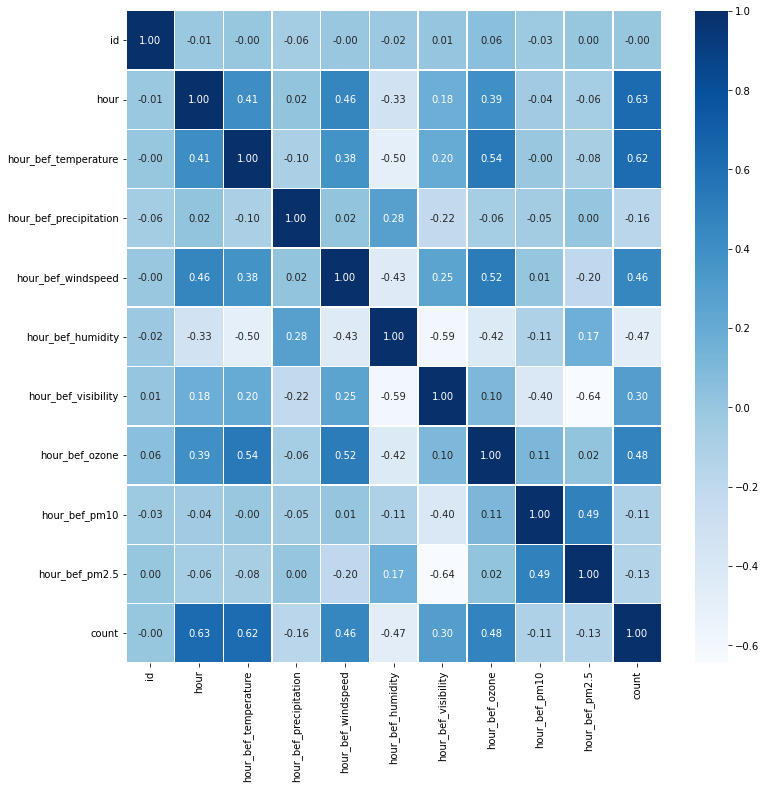

In [10]:
#train변수 간 상관관계 확인
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

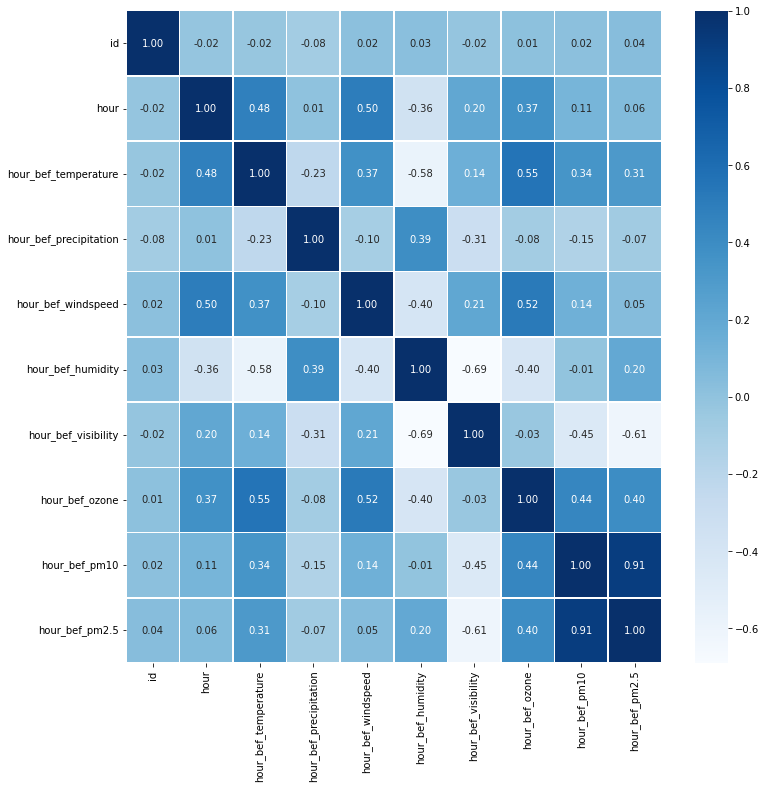

In [11]:
#test의 변수 간 상관관계를 확인
plt.figure(figsize=(12,12))
sns.heatmap(data=test.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [ ]:
#train의 각 변수별 분포 확인
plt.figure(figsize=(11,11))
for i in range(1,11):
  plt.subplot(3,4,i)
  sns.histplot(train.iloc[:,i],kde=True)
plt.tight_layout()
plt.show()


In [ ]:
#test의 각 변수별 분포별 확인
plt.figure(figsize=(11,11))
for i in range(1,10):
  plt.subplot(3,4,i)
  sns.histplot(test.iloc[:,i],kde=True)
plt.tight_layout()
plt.show()



# decribe()함수
- count: 해당 column에서 비어 있지 않은 값의 개수
- mean: 평균
- std: 표준편차
- min: 최솟값 (이상치 포함)
- 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
- 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
- 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
- max: 최댓값 (이상치 포함)

In [14]:
### 그래프로 볼 수 있는 방법 알아보기
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [15]:
#결측치 확인
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [68]:
# 결측치중에 가장 많은 hour_bef_pm2.5 데이터 살펴보기
train['hour_bef_pm2.5'].value_counts()

30.327124    117
22.000000     69
19.000000     64
21.000000     62
25.000000     55
            ... 
75.000000      1
82.000000      1
78.000000      1
72.000000      1
74.000000      1
Name: hour_bef_pm2.5, Length: 80, dtype: int64

# 결측치 처리

In [17]:
train_isna_sum=train.isna().sum()

In [18]:
train_isna_sum[train_isna_sum!=0].index

Index(['hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed',
       'hour_bef_humidity', 'hour_bef_visibility', 'hour_bef_ozone',
       'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')

In [19]:
na_columns=train_isna_sum[train_isna_sum!=0].index

In [20]:
def fill_bicycle_na(df,column):
  df[column] = df[column].fillna(value = df[column].mean())

In [21]:
fill_bicycle_na(train, 'hour_bef_precipitation')


In [22]:
#train함수 결측값 대체

for col in na_columns:
    
    fill_bicycle_na(train, col)
    
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [23]:
test_isna_sum = test.isna().sum()
test_na_columns = test_isna_sum[test_isna_sum != 0].index
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [24]:
#test함수값 대체 완료
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '대체 완료')

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


## 'hour_bef_pm2.5'만 75% (Q3) 37으로 변경

In [25]:
train['hour_bef_pm2.5']=train['hour_bef_pm2.5'].fillna(37)

In [26]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [27]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

# 데이터 정형화

In [74]:

train_x=train.drop(['id','count'],axis=1)
train_y=train['count']
test_x=test.drop('id',axis=1)

- train데이터에서 다시 train데이터 test데이터로 나누기 (모델평가를 위해)

In [75]:
##evaluation을 위해서 train데이터를 train와 valid값으로 다시 쪼개기 
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2, shuffle=True,random_state=3)

In [76]:
##train 데이터와 valid 데이터 shape 확인
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1167, 9), (292, 9), (1167,), (292,))

In [77]:
x_train.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
1319,11,18.3,0.0,0.8,58.0,941.0,0.018,56.000000,24.000000
328,12,13.1,0.0,3.1,48.0,1012.0,0.016,70.000000,57.000000
923,16,27.2,0.0,4.3,31.0,1281.0,0.088,57.168736,30.327124
126,17,27.2,0.0,4.4,45.0,1621.0,0.082,55.000000,32.000000
620,3,13.3,0.0,2.5,43.0,2000.0,0.037,19.000000,9.000000


In [78]:
x_test.head()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
140,10,18.2,0.0,2.4,60.0,527.0,0.039149,57.168736,30.327124
949,14,26.6,0.0,4.1,31.0,1976.0,0.076000,43.000000,25.000000
248,11,14.9,0.0,2.5,33.0,1928.0,0.023000,38.000000,20.000000
737,9,17.1,0.0,1.6,50.0,1416.0,0.007000,64.000000,44.000000
568,8,17.0,0.0,1.2,65.0,986.0,0.021000,32.000000,22.000000


#Random Forest 학습

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

In [80]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1167, 9), (1167,), (292, 9), (292,))

In [81]:
from sklearn.model_selection import GridSearchCV


In [82]:
model=RandomForestRegressor(n_estimators=200)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [85]:
pred = model.predict(x_test)

In [86]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred)) 

MAE:  25.654828767123284
MSE:  1361.2110696917807


#gridSearch 모듈 적용

In [ ]:

random_forest_tuning = RandomForestRegressor()
param_grid = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(x_train, y_train)

In [89]:
GSCV.best_params_ 

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

## gridSearch를 이용한 random forest모델 학습

In [90]:
pred=GSCV.predict(x_test)

In [91]:
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred)) 

MAE:  26.98035817591218
MSE:  1473.4069852646269


#실제 데이터로 GridSearchCV 적용

In [ ]:
random_forest_tuning = RandomForestRegressor()
param_grid = {
   'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,7,8],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(train_x, train_y)
GSCV.best_params_ 

In [93]:
pred=GSCV.predict(test_x)

In [94]:
smpl_sub

,id,count
0,0,90.264732
1,1,236.134276
2,2,72.764511
3,4,32.110968
4,5,71.974667
...,...,...
710,2148,56.682356
711,2149,65.691801
712,2165,118.153909
713,2166,157.726482


In [95]:
smpl_sub['count']=pred

In [96]:
smpl_sub

,id,count
0,0,89.757135
1,1,227.258426
2,2,81.405738
3,4,30.981200
4,5,77.649325
...,...,...
710,2148,57.175968
711,2149,70.527826
712,2165,119.919618
713,2166,164.147347


In [97]:
smpl_sub.to_csv('submission.csv',index=False)

** MAE
- 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화

- MAE는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영된다. 그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다 2배가 나쁜 도메인에서 쓰기 적합한 산식이다.

- 에러에 따른 손실이 선형적으로 올라갈 때 적합하다.

- 이상치가 많을 때

**MSE
- 실제 값과 예측 값의 차이를 제곱해 평균화

- 예측값과 실제값 차이의 면적의 합

- 특이값이 존재하면 수치가 많이 늘어난다.

## 결론
1. 제출 점수 45.561251 605등/3,404등
- random forest model이용
- MAE: 25.654828767123284
- MSE: 1361.2110696917807

2. 2차 결측치가 가장 큰 hour_bef_pm2.5를 37로 수정(이전은 평균)
- 37:75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
- MAE: 25.571729452054793
- MSE: 1354.32050864726
- 2차 제출 점수 45.468832 586등/3,404등



3. 3차 GridSearchCV를 통한 모델 튜닝
- param_grid = {
'n_estimators': [50, 150, 250],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['mse', 'mae']
}
- MAE: 26.98352999842457
- MSE: 1480.4831960179981
- 큰 차이는 없어보임
- 실제데이터 적용에는 ->n_estimators: 5, 20, 50
- 3차 제출 점수 44.992285788 446등 / 3404 등

#stacking momdel

In [ ]:

# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 

In [ ]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsRegressor()))
	level0.append(('cart', DecisionTreeRegressor()))
	level0.append(('svm', SVR()))
	# define meta learner model
	level1 = LinearRegression()
	# define the stacking ensemble
	model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
	return model
 

In [ ]:
# get a list of models to evaluate

def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	models['stacking'] = get_stacking()
	return models
 
 

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 

In [ ]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
smpl_sub

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN
...,...,...
710,2148,NaN
711,2149,NaN
712,2165,NaN
713,2166,NaN


결측치 처리

Normalization

모델 정의 및 학습(최소 두가지 모델을 적용해보기)
랜덤포레스트 & 앙상블 모델(sticking)이 좋을듯하다.
sticking
regression (회귀)